[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'^GSPC'}, xlabel='Date'>

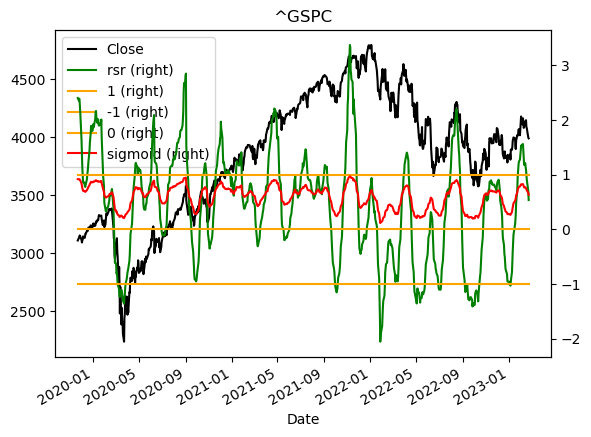

In [166]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyfinance.ols import RollingOLS, PandasRollingOLS
from scipy.stats import norm
import pandas_ta as ta
import math

def slope(df):
    y=df['Close'].values
    x=df['X'].values
    fit = np.polyfit(x,y,deg=1)
    n = len(x)
    m = fit[0]
    c = fit[1]
    return m

def rolling_pipe(dataframe,window):
    return pd.Series([dataframe.iloc[i-window: i].pipe(slope) 
                      if i >= window else None 
                      for i in range(1, len(dataframe)+1)],
                     index = dataframe.index)

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

window=25
ticker='^GSPC'
df=yf.download(tickers= ticker,start= '2019-10-1',end='2021-09-30',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
df['X'] = np.arange(len(df))
df['MA']=df['Close'].rolling(window).mean()
df['pctchg']=df['Close'].pct_change()*100
df['stdev'] = df['pctchg'].rolling(window).std()
df['slope']=df.pipe(rolling_pipe, window)
df['lrrr']=100*(window-1)*df['slope']/(df['MA']-(window-1)/2*df['slope'])
df['rsr']=df['lrrr']/(window**0.5*df['stdev'])
df['sigmoid']=df['rsr'].apply(sigmoid)
df['1']=1
df['-1']=-1
df['0']=0
df.loc[df.index>'2019-11-21'][['Close','rsr','1','-1','0','sigmoid']].\
plot(secondary_y=['rsr','1','-1','0','sigmoid'],title=ticker,color=['black','green','orange','orange','orange','red'])

In [154]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 5,
                       ):
    print(df)

                  Open        High         Low       Close      Volume    X  \
Date                                                                          
2021-11-01  4610.62012  4620.33984  4595.06006  4613.66992  3971540000    0   
2021-11-02  4613.33984  4635.14990  4613.33984  4630.64990  3975250000    1   
2021-11-03  4630.64990  4663.45996  4621.18994  4660.56982  4319660000    2   
2021-11-04  4662.93018  4683.00000  4662.58984  4680.06006  4462300000    3   
2021-11-05  4699.25977  4718.50000  4681.31982  4697.52979  4467180000    4   
2021-11-08  4701.47998  4714.91992  4694.39014  4701.70020  4269710000    5   
2021-11-09  4707.25000  4708.52979  4670.87012  4685.25000  4117080000    6   
2021-11-10  4670.25977  4684.85010  4630.85986  4646.70996  4503720000    7   
2021-11-11  4659.39014  4664.54980  4648.31006  4649.27002  3926870000    8   
2021-11-12  4655.24023  4688.47021  4650.77002  4682.85010  3728600000    9   
2021-11-15  4689.29980  4697.41992  4672.85986  4682